# シェルソート

- 基本挿入法
- シェルソート

In [1]:
# display graph on notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time
import random
from my_modules import least_square

In [7]:
# 基本挿入法
def insert_sort(array):
    N = len(array)
    for i in range(N):
        for j in reversed(range(1, i+1)):
            if array[j-1] > array[j]:
                buff = array[j]
                array[j] = array[j-1]
                array[j-1] = buff
            else:
                break

In [55]:
arr = np.array([random.randint(0, 100) for i in range(30)])
insert_sort(arr)
arr

array([ 7,  9, 10, 18, 20, 20, 21, 27, 27, 35, 35, 38, 38, 44, 51, 52, 56,
       59, 63, 67, 69, 73, 77, 79, 83, 84, 92, 92, 94, 96])

In [9]:
n_list = []
t_list = []
for n in [1000*i for i in range(1, 10+1)]:
    arr = np.array([random.random() for i in range(n)])
    start = time.time()
    insert_sort(arr)
    end = time.time()
    n_list.append(n)
    t_list.append(round(end-start, 6))

pd.DataFrame(data=np.array([n_list, t_list]).T, columns=['array length', 'sort time [s]'])

,array length,sort time [s]
0,1000.0,0.422002
1,2000.0,1.594996
2,3000.0,3.671310
3,4000.0,7.067732
4,5000.0,11.041973
5,6000.0,15.744850
6,7000.0,21.590407
7,8000.0,25.526611
8,9000.0,32.216188
9,10000.0,39.851887


,a
0,-1.107189e+00
1,7.818816e-04
2,3.293412e-07


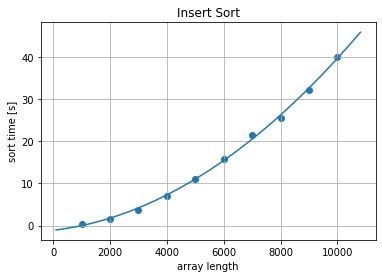

In [10]:
plt.grid()
plt.title('Insert Sort')
plt.xlabel('array length')
plt.ylabel('sort time [s]')
a = least_square.least_square(np.array([n_list, t_list]).T, 2, True)
pd.DataFrame(data=a, columns=['a'])

In [109]:
# シェルソート
def shell_sort(array):
    N = len(array)
    gap = 1
    while 3*gap+1 < N:
        gap = 3 * gap + 1
    while gap > 0:
        for i in range(gap):
            for j in range(int((N-i)/gap)):
                for k in reversed(range(1, j+1)):
                    index = i + k*gap
                    if array[index-gap] > array[index]:
                        buff = array[index]
                        array[index] = array[index-gap]
                        array[index-gap] = buff
                    else:
                        break
        gap = int((gap - 1) / 3)

In [120]:
arr = np.array([random.randint(0, 100) for i in range(30)])
shell_sort(arr)
arr

array([ 0,  6, 12, 15, 16, 18, 21, 24, 28, 29, 30, 38, 43, 44, 48, 50, 51,
       59, 71, 75, 79, 80, 80, 82, 85, 89, 89, 92, 93, 99])

In [126]:
n_list = []
t_list = []
sorted_before = []
sorted_after = []
for n in [10000*i for i in range(1, 10+1)]:
    arr = np.array([random.random() for i in range(n)])
    
    b = True
    for i in range(len(arr)-1):
        b = b and arr[i] < arr[i+1]
    sorted_before.append(b)
    
    start = time.time()
    shell_sort(arr)
    end = time.time()
    n_list.append(n)
    t_list.append(round(end-start, 6))
    
    b = True
    for i in range(len(arr)-1):
        b = b and arr[i] < arr[i+1]
    sorted_after.append(b)

pd.DataFrame(data=np.array([n_list, t_list, sorted_before, sorted_after]).T, columns=['array length', 'sort time [s]', 'sorted (before)', 'sorted (after)'])

,array length,sort time [s],sorted (before),sorted (after)
0,10000.0,0.653702,0.0,1.0
1,20000.0,1.520996,0.0,1.0
2,30000.0,2.673308,0.0,1.0
3,40000.0,3.050898,0.0,1.0
4,50000.0,3.811066,0.0,1.0
5,60000.0,5.613125,0.0,1.0
6,70000.0,6.169677,0.0,1.0
7,80000.0,7.566804,0.0,1.0
8,90000.0,8.443675,0.0,1.0
9,100000.0,8.839703,0.0,1.0


,a
0,-3.167283e-01
1,9.023142e-05
2,4.890799e-11


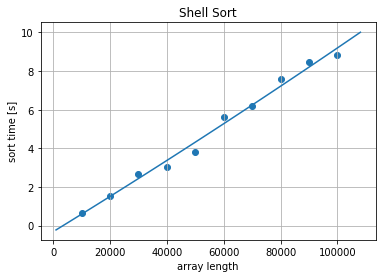

In [127]:
plt.grid()
plt.title('Shell Sort')
plt.xlabel('array length')
plt.ylabel('sort time [s]')
a = least_square.least_square(np.array([n_list, t_list]).T, 2, True)
pd.DataFrame(data=a, columns=['a'])
# かなり高速 & ほぼ1次関数くらいのオーダーに見える